In [1]:
import numpy as np
import sympy
emc = float( sympy.S.EulerGamma.n(10) )
from tteVAMP.problem import Problem
from tteVAMP.simulations import sim_model
from tteVAMP.vamp import infere
from tteVAMP.utils import plot_metrics

EM updates are stable in low-dimensional setting

Weibull
gam1 =  0.01
tau1 =  0.1
alpha =  60.136325138281805
s.shape =  (100,)
**** iteration =  0  **** 

->DENOISING
x1_hat[2] =  [0.]
B / (A+B) =  [0.04976421]
gam1 / (gam1 + 1/sigma) =  0.009900990099009901
alpha1 part I =  [0.00049271]
alpha2 part II =  [0.]
alpha1 =  0.0004927149309449357
true gam2 =  14.64717879889327
gam2 =  20.285711316930986
corr(z1_hat, X*beta_true) =  0.9721098217179749
l2 error for z1_hat =  0.23553300589599196
v1 =  0.0002997420433173985
true tau2 =  2459.958114762066
tau2 = 333.5201985322075
->LMMSE
corr(x2_hat, beta_true) =  [[0.99268236]]
l2 error for x2_hat =  0.2011863513427952
alpha2 =  0.12358975436085137
true gam1 =  882.4999400154396
gam1 =  143.8517725856727
corr(z2_hat, beta_true) =  [[0.99587051]]
l2 error for z2_hat =  0.15302365021546466
true tau1 =  5639.136898854849
tau1 =  2710.900609569851


**** iteration =  1  **** 

->DENOISING
x1_hat[2] =  [-8.89940966e-05]
corr(x1_hat, beta_true) =  0.9985528444221963
l2 error for x1_hat =  0.083156

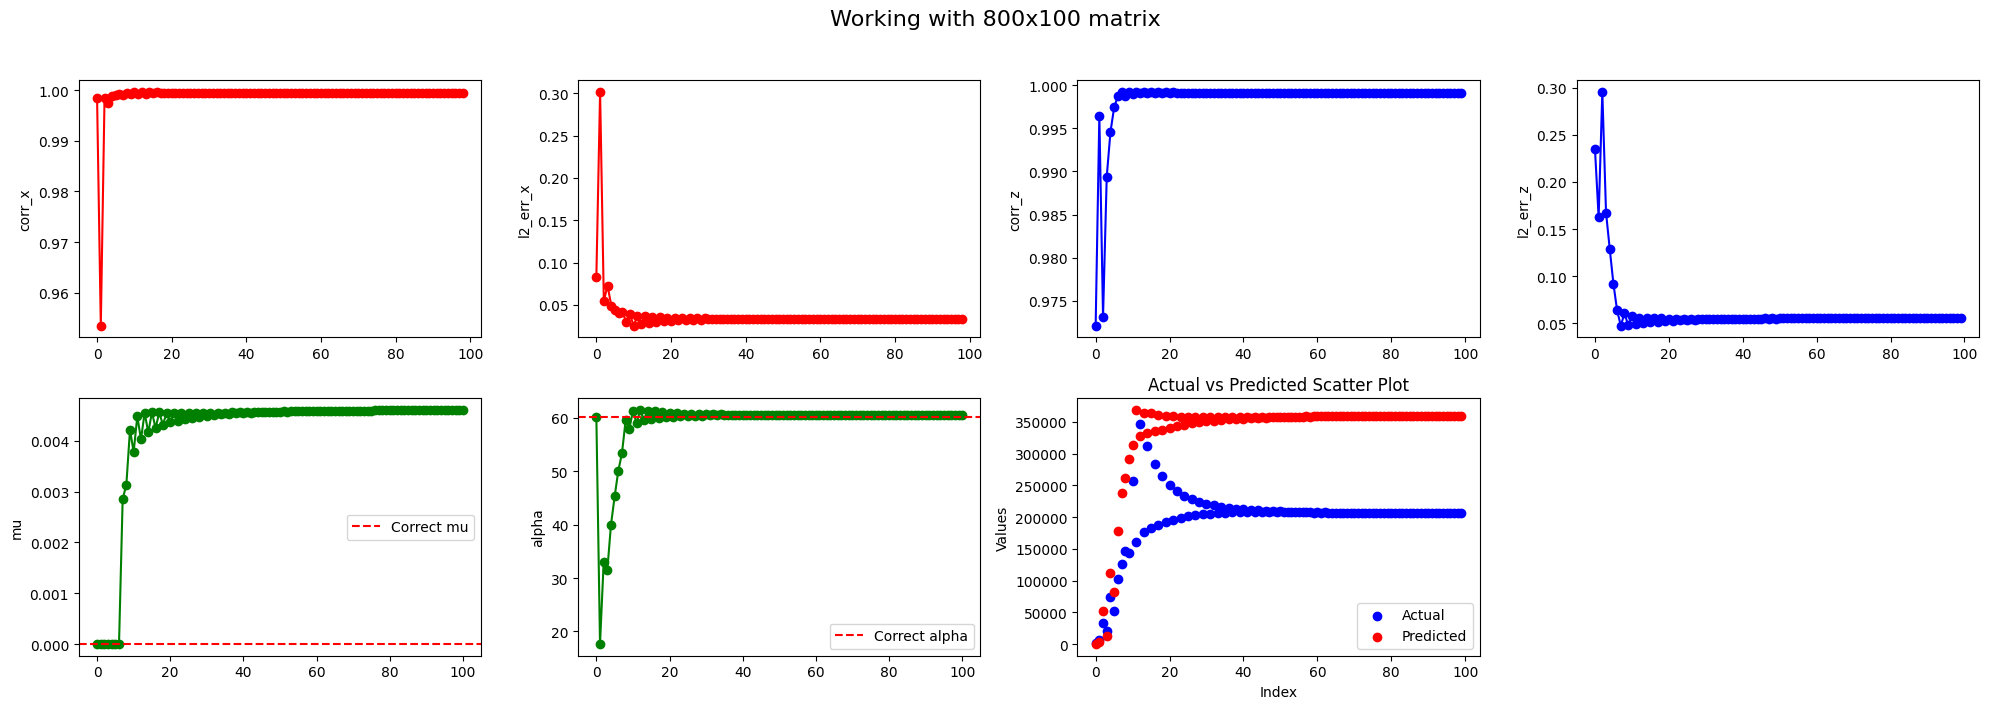

In [9]:
np.random.seed(42)
n=800
m=100
p=0.4
la=0.05
# This is where the sigma is defined. Note that the scope of this definition extends to gvamp
sigma=1
omega=1
h2=0.9
gam1 = 1e-2
tau1 = 1e-1
mu=np.full((n,1), 0) 
maxiter = 100
problem_instance = Problem(n=n, m=m, la=la, sigmas = [sigma], omegas=[omega], model='Weibull', mu=mu)
X,beta,y,alpha = sim_model(problem_instance,h2,p )

print("gam1 = ", gam1)
print("tau1 = ", tau1)
print("alpha = ", alpha)

# we start with an initialization that compleately complies with the assumptions
r1 = np.zeros((m,1))
#r1 = beta + random.normal(loc=0.0, scale=np.sqrt(1.0/gam1), size=[m,1])
p1 = np.zeros((n,1)) 
#p1 = X @ beta + random.normal(loc=0.0, scale=np.sqrt(1.0/tau1), size=[n,1])
problem_instance.prior_instance.distribution_parameters['alpha']=alpha

est, gam1, corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, a, ps, dl_dmus, z1_hats =  infere(X, y, gam1, r1, tau1, p1, problem_instance, maxiter, beta, True, True)
plot_metrics(corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, dl_dmus, a, ps, mu[0][0], alpha, n, m)

Weibull
gam1 =  0.01
tau1 =  0.1
alpha =  21.3610066663135
s.shape =  (800,)
**** iteration =  0  **** 

->DENOISING
x1_hat[2] =  [0.]
B / (A+B) =  [0.04976421]
gam1 / (gam1 + 1/sigma) =  0.009900990099009901
alpha1 part I =  [0.00049271]
alpha2 part II =  [0.]
alpha1 =  0.0004927149309449356
true gam2 =  16.495735851994617
gam2 =  20.28571131693099
corr(z1_hat, X*beta_true) =  0.032437375494478796
l2 error for z1_hat =  0.9994786709641467
v1 =  0.642190379494197
true tau2 =  26.01344837018179
tau2 = 0.055717063339943154
->LMMSE
corr(x2_hat, beta_true) =  [[-0.06388917]]
l2 error for x2_hat =  1.0000468474923223
alpha2 =  0.9979581889231127
true gam1 =  14.712490678934254
gam1 =  0.04150433407850765
corr(z2_hat, beta_true) =  [[0.9255022]]
l2 error for z2_hat =  0.9929889721125841
true tau1 =  30.819569569750513
tau1 =  27.23234301755808


**** iteration =  1  **** 

->DENOISING
x1_hat[2] =  [-0.00013211]
corr(x1_hat, beta_true) =  -0.06389025933547711
l2 error for x1_hat =  1.00004483

/Users/alexanders/vampW/tteVAMP/em.py:31: RuntimeWarning: overflow encountered in exp
  out = n / alpha + np.sum(res) - np.exp(-emc) * np.sum( np.exp(alpha * res + (alpha**2)/2/xi) * (res + alpha/xi) )
/Users/alexanders/vampW/tteVAMP/em.py:37: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  alpha_new = scipy.optimize.fsolve(update_Weibull_alpha_eq, x0 = alpha_old, args=(y, mu, z_hat, xi))


corr(z1_hat, X*beta_true) =  0.9934623836293804
l2 error for z1_hat =  0.12155999329776622
v1 =  0.15095392135790509
true tau2 =  279.4037271263297
tau2 = 153.16935024479443
->LMMSE
corr(x2_hat, beta_true) =  [[0.85432185]]
l2 error for x2_hat =  0.528875657421918
alpha2 =  0.41178848104208504
true gam1 =  36.34989206753095
gam1 =  30.275133429983804
corr(z2_hat, beta_true) =  [[0.99282061]]
l2 error for z2_hat =  0.15876654045839275
true tau1 =  112.42836726765331
tau1 =  107.22906989521192


**** iteration =  2  **** 

->DENOISING
x1_hat[2] =  [-0.00204916]
corr(x1_hat, beta_true) =  0.9763459070781174
l2 error for x1_hat =  0.23033698279243225
B / (A+B) =  [0.01016108]
gam1 / (gam1 + 1/sigma) =  0.9680257159497427
alpha1 part I =  [0.00983618]
alpha2 part II =  [0.00169163]
alpha1 =  0.10485072723367689
true gam2 =  275.2631966914324
gam2 =  258.46996380249175
corr(z1_hat, X*beta_true) =  0.9937372934312128
l2 error for z1_hat =  0.13124445735094364
v1 =  0.37066081736805884
true ta

/Users/alexanders/vampW/tteVAMP/denoisers.py:19: RuntimeWarning: invalid value encountered in divide
  ratio = gam1 * r / (gam1 + 1/prior.sigmas[0]) * B / (A + B)
/Users/alexanders/vampW/tteVAMP/denoisers.py:27: RuntimeWarning: invalid value encountered in divide
  print("B / (A+B) = ", B[1] / (A[1]+B[1]))
/Users/alexanders/vampW/tteVAMP/denoisers.py:30: RuntimeWarning: invalid value encountered in divide
  BoverAplusBder = ( Bder * A - Ader * B ) / (A+B) / (A+B)
/Users/alexanders/vampW/tteVAMP/denoisers.py:32: RuntimeWarning: invalid value encountered in divide
  print("alpha1 part I = ", gam1 / (gam1 + 1/prior.sigmas[0]) * B[1] / (A[1] + B[1]))
/Users/alexanders/vampW/tteVAMP/denoisers.py:34: RuntimeWarning: invalid value encountered in divide
  ratio = gam1 / (gam1 + 1/prior.sigmas[0]) * B / (A + B) + BoverAplusBder * r * gam1 / (gam1 + 1.0/prior.sigmas[0])


corr(z1_hat, X*beta_true) =  -0.9185912429719091
l2 error for z1_hat =  14.423507577329502
v1 =  1.100229943419886e-08
true tau2 =  248.75619691163973
tau2 = 880742777.8589447
->LMMSE
corr(x2_hat, beta_true) =  [[nan]]
l2 error for x2_hat =  nan
alpha2 =  nan
true gam1 =  nan
gam1 =  nan
corr(z2_hat, beta_true) =  [[nan]]
l2 error for z2_hat =  nan
true tau1 =  nan
tau1 =  nan


**** iteration =  79  **** 

->DENOISING
x1_hat[2] =  [nan]
corr(x1_hat, beta_true) =  nan
l2 error for x1_hat =  nan
B / (A+B) =  [nan]
gam1 / (gam1 + 1/sigma) =  nan
alpha1 part I =  [nan]
alpha2 part II =  [nan]
alpha1 =  nan
true gam2 =  nan
gam2 =  nan
corr(z1_hat, X*beta_true) =  nan
l2 error for z1_hat =  nan
v1 =  nan
true tau2 =  nan
tau2 = nan
->LMMSE
corr(x2_hat, beta_true) =  [[nan]]
l2 error for x2_hat =  nan
alpha2 =  nan
true gam1 =  nan
gam1 =  nan
corr(z2_hat, beta_true) =  [[nan]]
l2 error for z2_hat =  nan
true tau1 =  nan
tau1 =  nan


**** iteration =  80  **** 

->DENOISING
x1_hat[2] =  [n

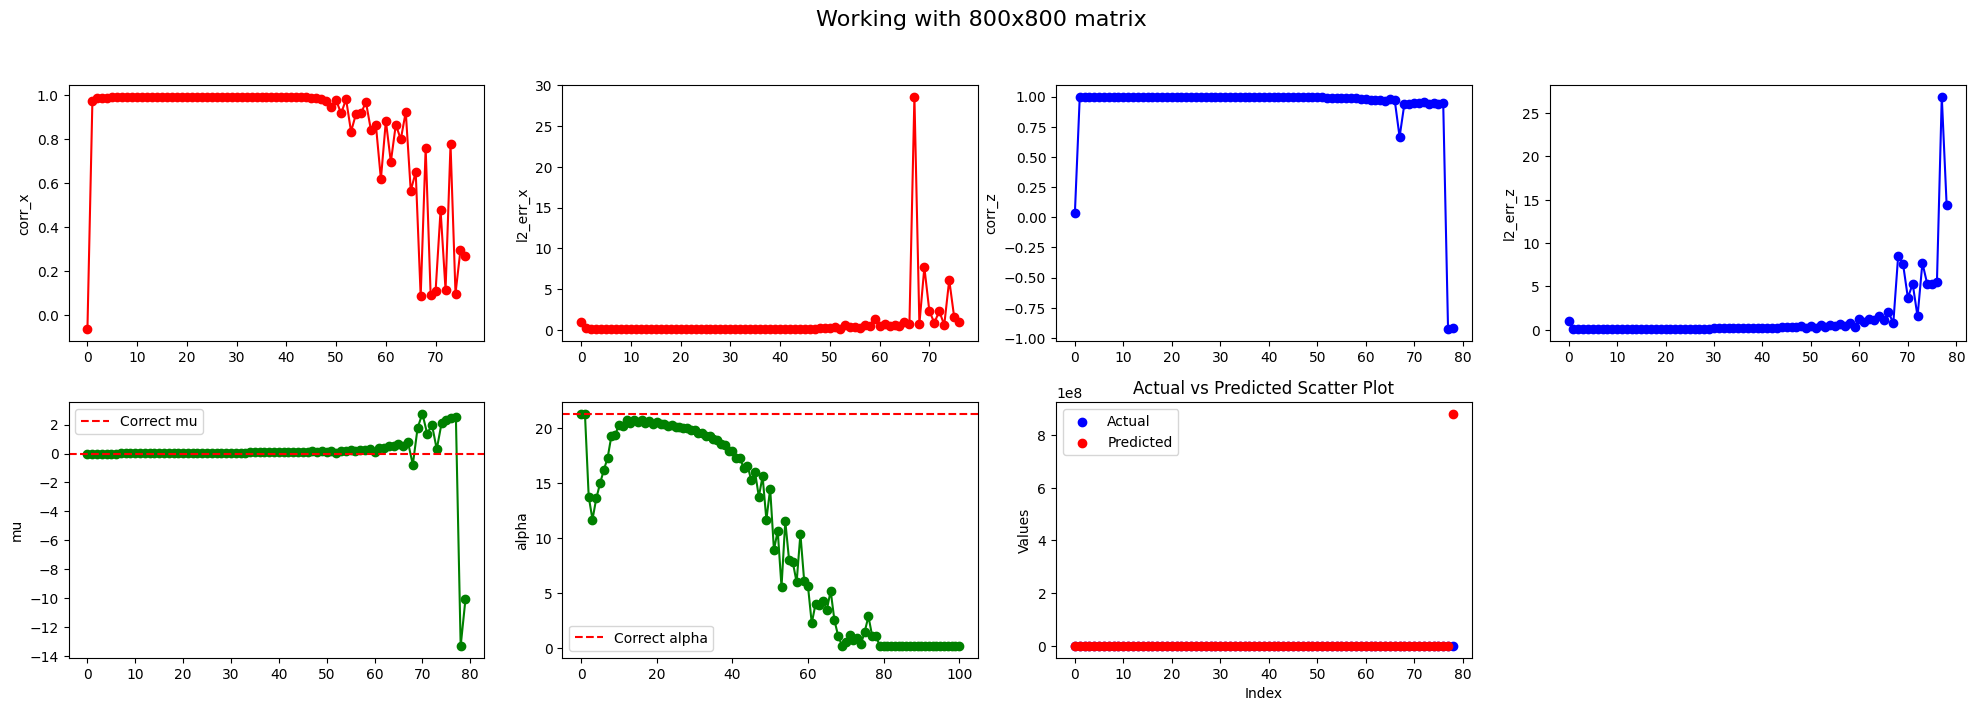

In [4]:
np.random.seed(42)
n=800
m=800
p=0.4
la=0.05
# This is where the sigma is defined. Note that the scope of this definition extends to gvamp
sigma=1
omega=1
h2=0.9
gam1 = 1e-2
tau1 = 1e-1
mu=np.full((n,1), 0) 
maxiter = 100
problem_instance = Problem(n=n, m=m, la=la, sigmas = [sigma], omegas=[omega], model='Weibull', mu=mu)
X,beta,y,alpha = sim_model(problem_instance,h2,p )

print("gam1 = ", gam1)
print("tau1 = ", tau1)
print("alpha = ", alpha)

# we start with an initialization that compleately complies with the assumptions
r1 = np.zeros((m,1))
#r1 = beta + random.normal(loc=0.0, scale=np.sqrt(1.0/gam1), size=[m,1])
p1 = np.zeros((n,1)) 
#p1 = X @ beta + random.normal(loc=0.0, scale=np.sqrt(1.0/tau1), size=[n,1])
problem_instance.prior_instance.distribution_parameters['alpha']=alpha

est, gam1, corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, a, ps, dl_dmus, z1_hats =  infere(X, y, gam1, r1, tau1, p1, problem_instance, maxiter, beta, True, True)
plot_metrics(corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, dl_dmus, a, ps, mu[0][0], alpha, n, m)

Weibull
gam1 =  0.01
tau1 =  0.1
alpha =  21.3610066663135
s.shape =  (800,)
**** iteration =  0  **** 

->DENOISING
x1_hat[2] =  [0.]
B / (A+B) =  [0.04976421]
gam1 / (gam1 + 1/sigma) =  0.009900990099009901
alpha1 part I =  [0.00049271]
alpha2 part II =  [0.]
alpha1 =  0.0004927149309449356
true gam2 =  16.495735851994617
gam2 =  20.28571131693099
corr(z1_hat, X*beta_true) =  0.032437375494478796
l2 error for z1_hat =  0.9994786709641467
v1 =  0.642190379494197
true tau2 =  26.01344837018179
tau2 = 0.055717063339943154
->LMMSE
corr(x2_hat, beta_true) =  [[-0.06388917]]
l2 error for x2_hat =  1.0000468474923223
alpha2 =  0.9979581889231127
true gam1 =  14.712490678934254
gam1 =  0.04150433407850765
corr(z2_hat, beta_true) =  [[0.9255022]]
l2 error for z2_hat =  0.9929889721125841
true tau1 =  30.819569569750513
tau1 =  27.23234301755808


**** iteration =  1  **** 

->DENOISING
x1_hat[2] =  [-0.00013211]
corr(x1_hat, beta_true) =  -0.06389025933547711
l2 error for x1_hat =  1.00004483

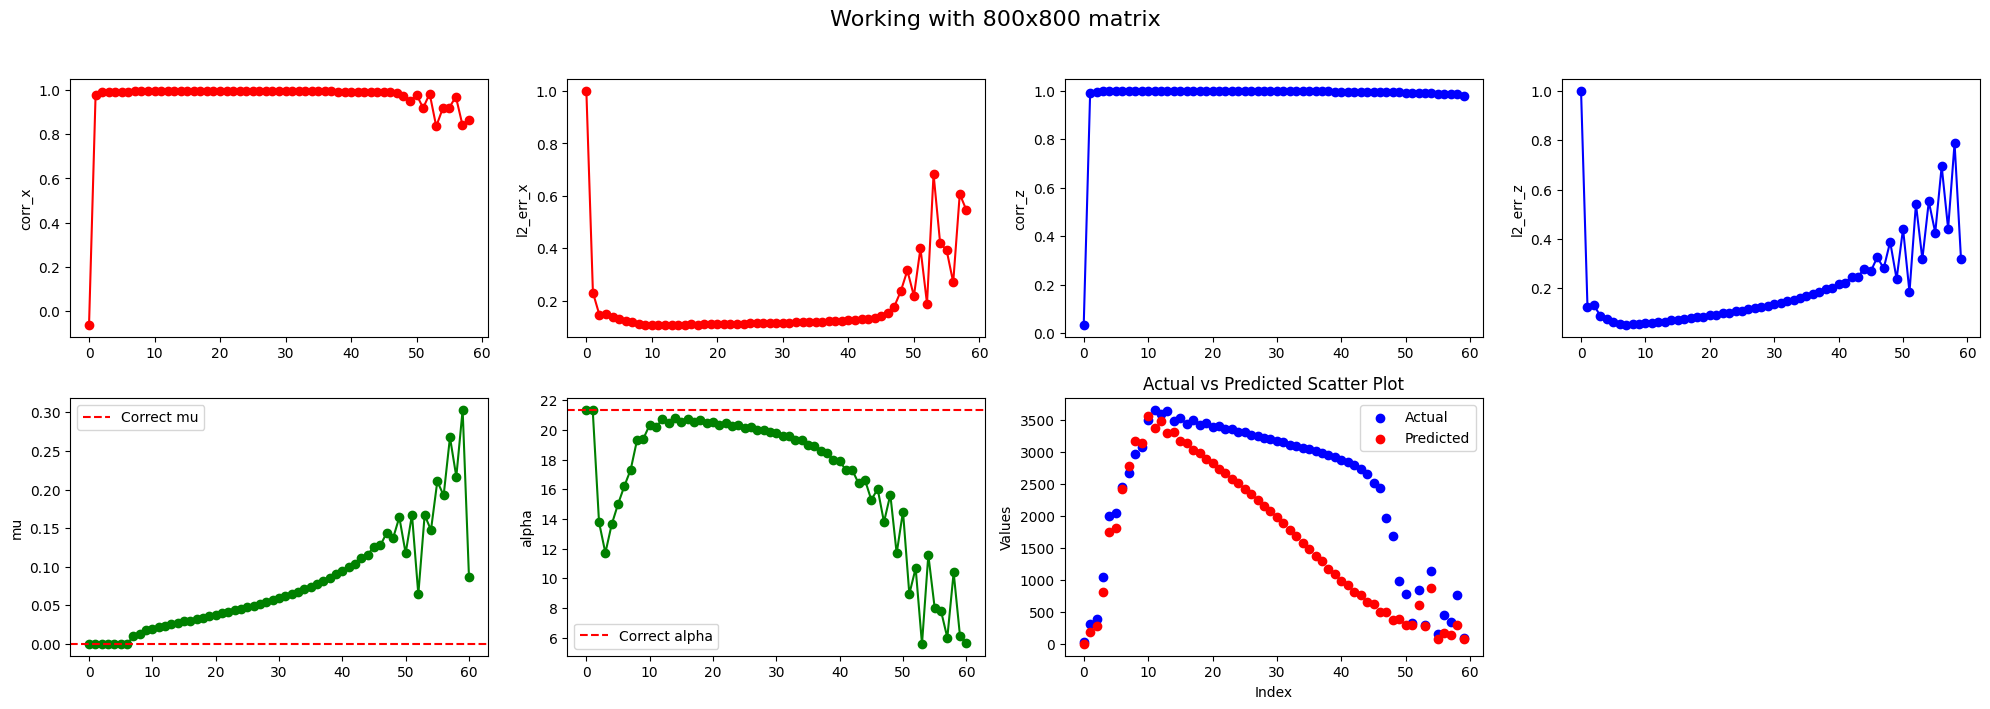

In [5]:
np.random.seed(42)
n=800
m=800
p=0.4
la=0.05
# This is where the sigma is defined. Note that the scope of this definition extends to gvamp
sigma=1
omega=1
h2=0.9
gam1 = 1e-2
tau1 = 1e-1
mu=np.full((n,1), 0) 
maxiter = 60
problem_instance = Problem(n=n, m=m, la=la, sigmas = [sigma], omegas=[omega], model='Weibull', mu=mu)
X,beta,y,alpha = sim_model(problem_instance,h2,p )

print("gam1 = ", gam1)
print("tau1 = ", tau1)
print("alpha = ", alpha)

# we start with an initialization that compleately complies with the assumptions
r1 = np.zeros((m,1))
#r1 = beta + random.normal(loc=0.0, scale=np.sqrt(1.0/gam1), size=[m,1])
p1 = np.zeros((n,1)) 
#p1 = X @ beta + random.normal(loc=0.0, scale=np.sqrt(1.0/tau1), size=[n,1])
problem_instance.prior_instance.distribution_parameters['alpha']=alpha

est, gam1, corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, a, ps, dl_dmus, z1_hats =  infere(X, y, gam1, r1, tau1, p1, problem_instance, maxiter, beta, True, True)
plot_metrics(corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, dl_dmus, a, ps, mu[0][0], alpha, n, m)

Weibull
gam1 =  0.01
tau1 =  0.1
alpha =  47.26550503261578
s.shape =  (200,)
**** iteration =  0  **** 

->DENOISING
x1_hat[2] =  [0.]
B / (A+B) =  [0.04976421]
gam1 / (gam1 + 1/sigma) =  0.009900990099009901
alpha1 part I =  [0.00049271]
alpha2 part II =  [0.]
alpha1 =  0.0004927149309449356
true gam2 =  18.331264799965286
gam2 =  20.28571131693099
corr(z1_hat, X*beta_true) =  0.14163969999539625
l2 error for z1_hat =  0.9899929478009614
v1 =  0.15127352106067596
true tau2 =  149.46728055412012
tau2 = 0.561054223494209
->LMMSE
corr(x2_hat, beta_true) =  [[0.26123121]]
l2 error for x2_hat =  0.9994365052432236
alpha2 =  0.9831149710279596
true gam1 =  19.202936165062898
gam1 =  0.3484076973689839
corr(z2_hat, beta_true) =  [[0.79693406]]
l2 error for z2_hat =  0.9909488596263176
true tau1 =  151.06384163814323
tau1 =  132.35058588639234


**** iteration =  1  **** 

->DENOISING
x1_hat[2] =  [-0.00079873]
corr(x1_hat, beta_true) =  0.2612420929850279
l2 error for x1_hat =  0.9996255599

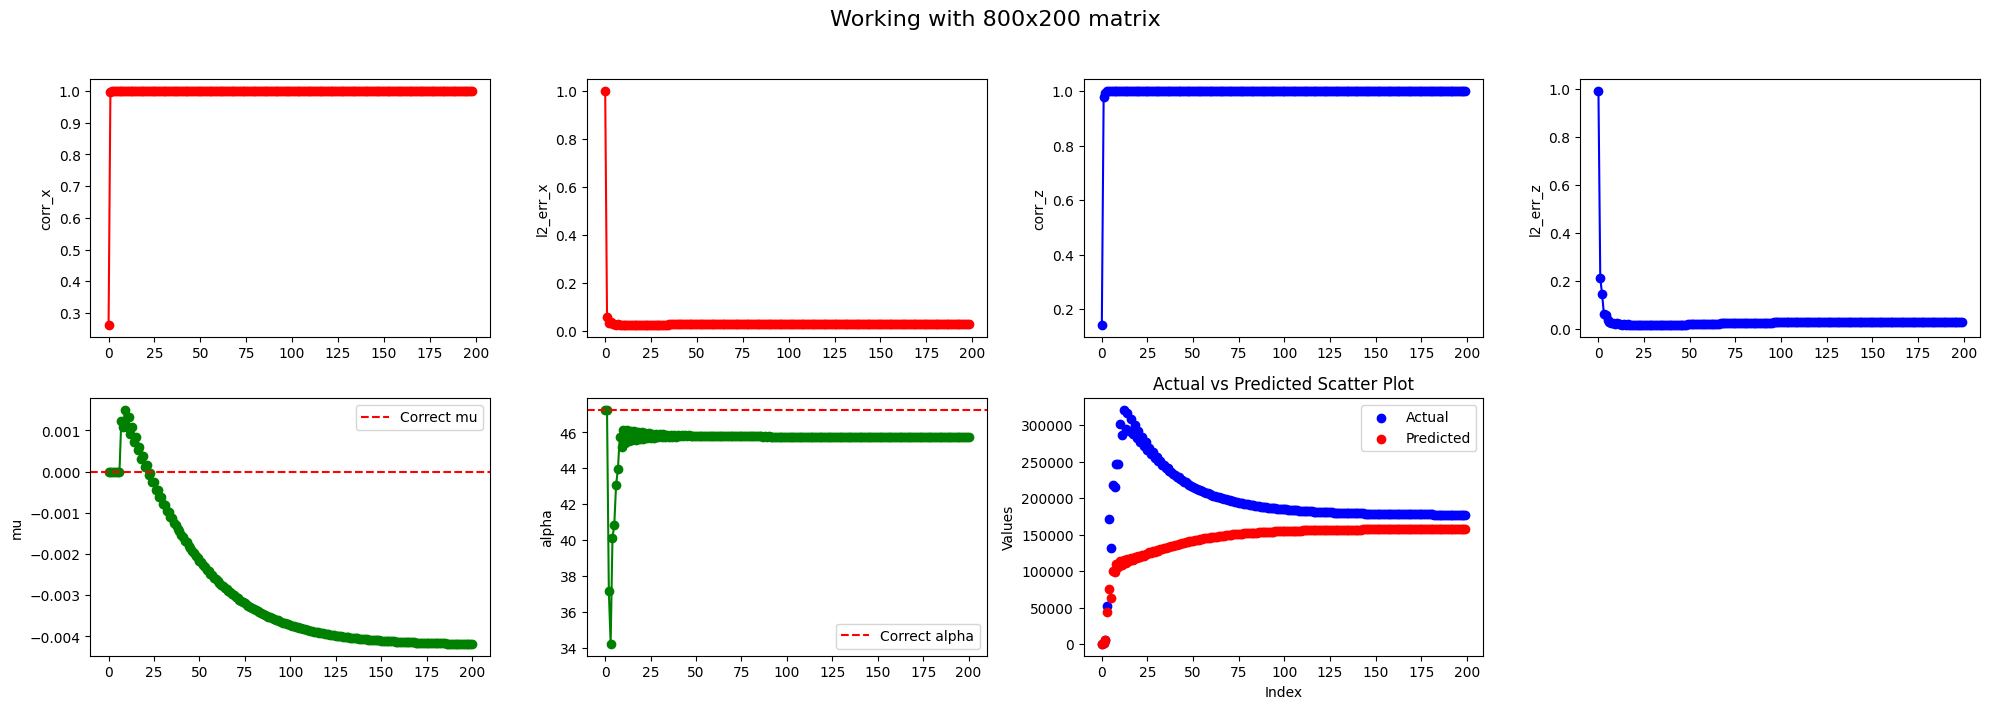

In [8]:
np.random.seed(42)
n=800
m=200
p=0.4
la=0.05
# This is where the sigma is defined. Note that the scope of this definition extends to gvamp
sigma=1
omega=1
h2=0.9
gam1 = 1e-2
tau1 = 1e-1
mu=np.full((n,1), 0) 
maxiter = 200
problem_instance = Problem(n=n, m=m, la=la, sigmas = [sigma], omegas=[omega], model='Weibull', mu=mu)
X,beta,y,alpha = sim_model(problem_instance,h2,p )

print("gam1 = ", gam1)
print("tau1 = ", tau1)
print("alpha = ", alpha)

# we start with an initialization that compleately complies with the assumptions
r1 = np.zeros((m,1))
#r1 = beta + random.normal(loc=0.0, scale=np.sqrt(1.0/gam1), size=[m,1])
p1 = np.zeros((n,1)) 
#p1 = X @ beta + random.normal(loc=0.0, scale=np.sqrt(1.0/tau1), size=[n,1])
problem_instance.prior_instance.distribution_parameters['alpha']=alpha

est, gam1, corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, a, ps, dl_dmus, z1_hats =  infere(X, y, gam1, r1, tau1, p1, problem_instance, maxiter, beta, True, True)
plot_metrics(corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, dl_dmus, a, ps, mu[0][0], alpha, n, m)

Once dimensionality increases, the EM updates for mu lead us in the wrong direction <br>
Correlation between true signal z and the predicted signal z1_hat after denoising (den_z) drops and the l2 error increases

In [2]:
np.random.seed(42)
n=800
m=200
r1 = np.zeros((m,1))
p1 = np.zeros((n,1))
mu=np.full((n,1), 0) 

problem_instance = Problem(n=n, m=m, la=la, sigmas = [sigma], omegas=[omega], model='Weibull', mu=mu)
X,beta,y,alpha = sim_model(problem_instance,h2,p )

print("gam1 = ", gam1)
print("tau1 = ", tau1)
print("alpha = ", alpha)

# we start with an initialization that compleately complies with the assumptions
r1 = np.zeros((m,1))
#r1 = beta + random.normal(loc=0.0, scale=np.sqrt(1.0/gam1), size=[m,1])
p1 = np.zeros((n,1)) 
#p1 = X @ beta + random.normal(loc=0.0, scale=np.sqrt(1.0/tau1), size=[n,1])
problem_instance.prior_instance.distribution_parameters['alpha']=alpha

est, gam1, corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, a, ps, dl_dmus, z1_hats =  infere(X, y, gam1, r1, tau1, p1, problem_instance, maxiter, beta, True, True)
plot_metrics(corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, dl_dmus, a, ps, mu[0][0], alpha, n, m)

NameError: name 'la' is not defined

Algorithm is stable if we fix mu to be empirical average of Log(Y)

Weibull
gam1 =  6.832321945119836
tau1 =  0.1
alpha =  2.9361235628007685
s.shape =  (800,)
**** iteration =  0  **** 

->DENOISING
x1_hat[2] =  [0.]
B / (A+B) =  [0.1923838]
gam1 / (gam1 + 1/sigma) =  0.8723239408432285
alpha1 part I =  [0.16782099]
alpha2 part II =  [0.]
alpha1 =  0.1678209941751314
true gam2 =  2.3722202522924425
gam2 =  33.87964009933029
corr(z1_hat, X*beta_true) =  0.5290047533799667
l2 error for z1_hat =  0.9605651047308081
v1 =  0.050136652118083234
true tau2 =  6.2399873309118306
tau2 = 1.8945488136000233
->LMMSE
corr(x2_hat, beta_true) =  [[0.51276119]]
l2 error for x2_hat =  0.9838370895090972
alpha2 =  0.9733751806234335
true gam1 =  1.9737519457061403
gam1 =  0.9267128607183136
corr(z2_hat, beta_true) =  [[-0.13045969]]
l2 error for z2_hat =  1.0248608479036438
true tau1 =  5.39872920888024
tau1 =  69.2626968677543


**** iteration =  1  **** 

->DENOISING
x1_hat[2] =  [-0.11978683]
corr(x1_hat, beta_true) =  0.5522706447810106
l2 error for x1_hat =  0.8836

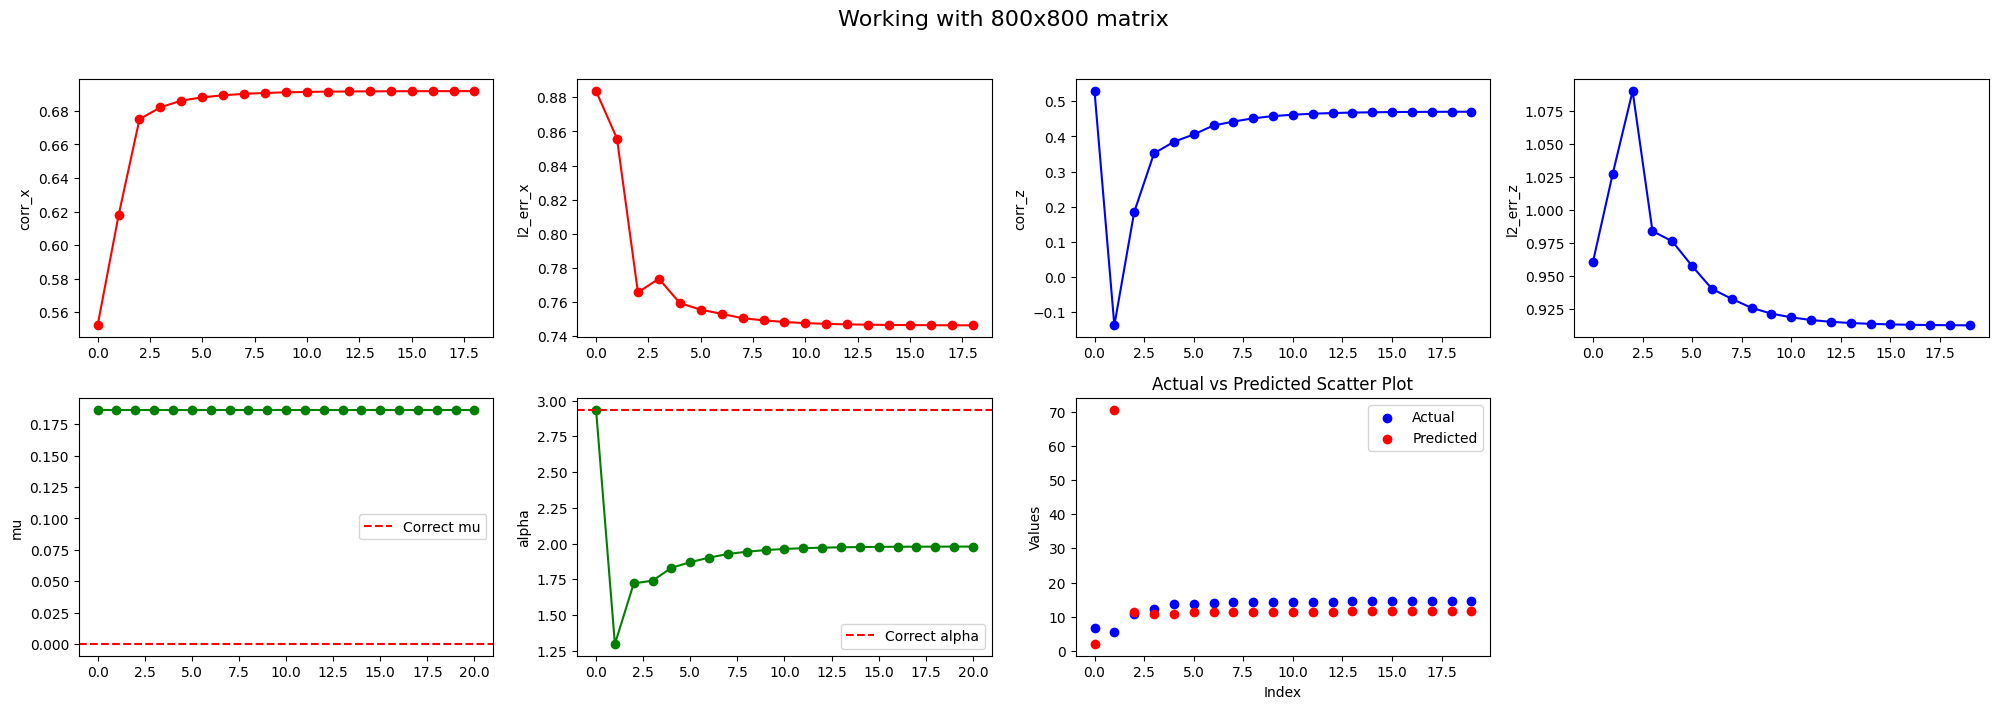

In [4]:
np.random.seed(42)
n=800
m=800
mu=np.full((n,1), 0) 
r1 = np.zeros((m,1))
p1 = np.zeros((n,1))

problem_instance = Problem(n=n, m=m, la=la, sigmas = [sigma], omegas=[omega], model='Weibull', mu=mu)
X,beta,y,alpha = sim_model(problem_instance,h2,p )
problem_instance.prior_instance.distribution_parameters['mu'] = np.mean(np.log(y)).reshape(-1, 1)

print("gam1 = ", gam1)
print("tau1 = ", tau1)
print("alpha = ", alpha)

# we start with an initialization that compleately complies with the assumptions
r1 = np.zeros((m,1))
#r1 = beta + random.normal(loc=0.0, scale=np.sqrt(1.0/gam1), size=[m,1])
p1 = np.zeros((n,1)) 
#p1 = X @ beta + random.normal(loc=0.0, scale=np.sqrt(1.0/tau1), size=[n,1])
problem_instance.prior_instance.distribution_parameters['alpha']=alpha

est, gam1, corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, a, ps, dl_dmus, z1_hats =  infere(X, y, gam1, r1, tau1, p1, problem_instance, maxiter, beta, False, True)
plot_metrics(corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, dl_dmus, a, ps, mu[0][0], alpha, n, m)